<center><img src="img/logo_hse_black.jpg"></center>

<h1><center>Методы машинного обучения</center></h1>
<h2><center>Семинар: метрические методы</center></h2>

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Стоимоcть жилья в Калифорнии

Будем использовать стандартный датасет из sklearn (Нужен интернет)

In [3]:
from sklearn.datasets import fetch_california_housing

In [4]:
data = fetch_california_housing()

X = data.data
y = data.target

In [6]:
X.shape

(20640, 8)

(array([ 877., 3612., 4099., 3771., 2799., 1769., 1239.,  752.,  479.,
        1243.]),
 array([0.14999 , 0.634992, 1.119994, 1.604996, 2.089998, 2.575   ,
        3.060002, 3.545004, 4.030006, 4.515008, 5.00001 ]),
 <a list of 10 Patch objects>)

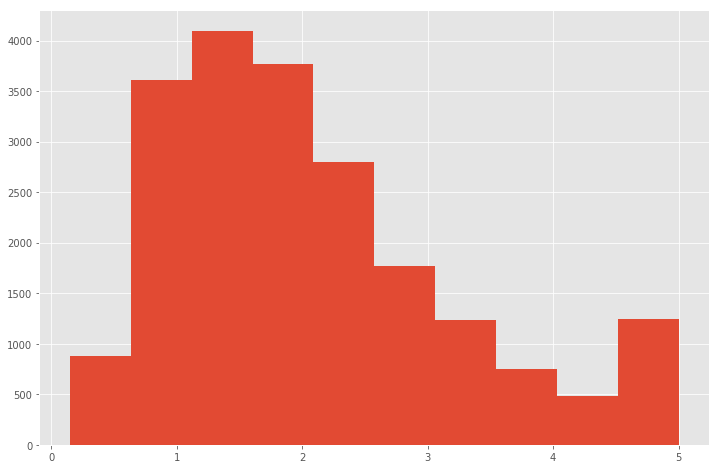

In [8]:
plt.hist(y)

In [5]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

* Нанесите координаты домов и раскрасте их в зависимости от их стоимости
    * HINT: `plt.scatter()`

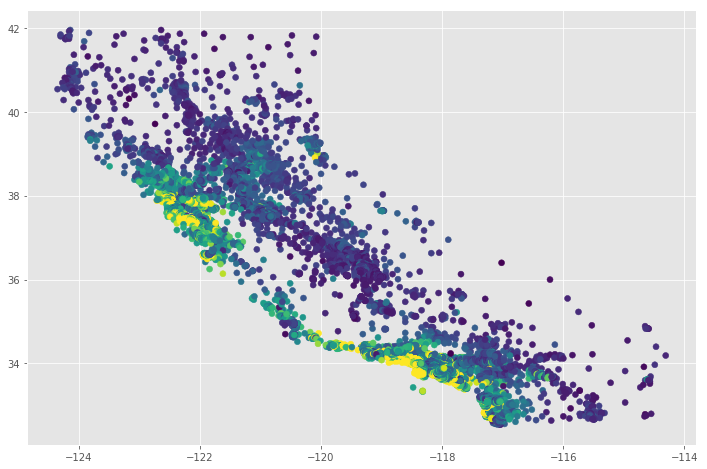

In [9]:
plt.scatter(X[:, -1], X[:, -2], c=y)

* Рассмотрим только координаты домов в качестве признаков. В качестве меры близости будем использовать [расстояние на сфере](https://ru.wikipedia.org/wiki/%D0%9E%D1%80%D1%82%D0%BE%D0%B4%D1%80%D0%BE%D0%BC%D0%B8%D1%8F) (Земле) между координатами. Для этого, для начала, надо перевести координаты из градусов в радианы
    * HINT: `np.radians`
* Расделите данные на обучающую и контрольную выборку
    * HINT: `sklearn.model_selection.train_test_split()` и не забудте указать `random_state`

In [10]:
X = X[:, -2:]

In [12]:
X = np.radians(X)

In [13]:
X[:10]

array([[ 0.66113072, -2.13331594],
       [ 0.66078165, -2.13314141],
       [ 0.66060712, -2.13349048],
       [ 0.66060712, -2.13366501],
       [ 0.66060712, -2.13366501],
       [ 0.66060712, -2.13366501],
       [ 0.66043259, -2.13366501],
       [ 0.66043259, -2.13366501],
       [ 0.66043259, -2.13383954],
       [ 0.66043259, -2.13366501]])

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=123)

In [16]:
X_train.shape

(16512, 2)

In [17]:
X_valid.shape

(4128, 2)

# * Создайте kNN классификатор с метрикой `haversine`
    * HINT: sklearn.metrics
* Для k = 1..15 изобразите среднее абсолютное отклонение ответов модели на обучающей и контрольной выборке
    * Какие методологические ошибки были допущены
    * Какое значение $k$ оптимально?

In [18]:
from sklearn.neighbors import KNeighborsRegressor

In [19]:
from sklearn.metrics import mean_absolute_error

In [20]:
knn = KNeighborsRegressor(n_neighbors=10, metric='haversine')

In [21]:
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='haversine',
          metric_params=None, n_jobs=None, n_neighbors=10, p=2,
          weights='uniform')

In [22]:
y_hat = knn.predict(X_valid)

In [23]:
y_hat.shape

(4128,)

In [26]:
mean_absolute_error(y_hat, y_valid)

0.33340470712209297

In [27]:
quality_valid = []
quality_train = []

for k in range(1,16):
    knn = KNeighborsRegressor(n_neighbors=k, metric='haversine')
    knn.fit(X_train, y_train)
    y_hat_valid = knn.predict(X_valid)
    y_hat_train = knn.predict(X_train)
    
    quality_valid.append(mean_absolute_error(y_valid, y_hat_valid))
    quality_train.append(mean_absolute_error(y_train, y_hat_train))
    

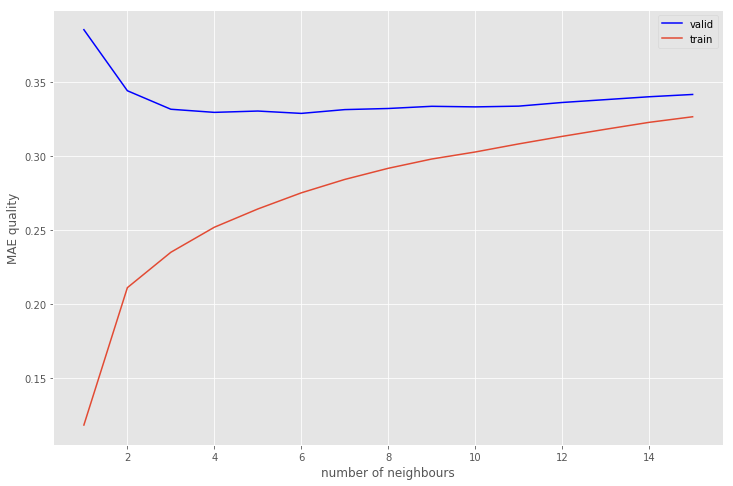

In [31]:
k_range = range(1,16)
plt.plot(k_range, quality_valid, color='blue', label='valid')
plt.plot(k_range, quality_train, label='train')
plt.xlabel('number of neighbours')
plt.ylabel('MAE quality')
plt.legend()

# Оценка уровня заработка

### *1. Categorical Attributes*
 * workclass: (categorical) Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
  -  Individual work category  
 * education: (categorical) Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
  -  Individual's highest education degree  
 * marital-status: (categorical) Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
  -  Individual marital status  
 * occupation: (categorical) Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
  -  Individual's occupation  
 * relationship: (categorical) Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
  -  Individual's relation in a family   
 * race: (categorical) White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
  -  Race of Individual   
 * sex: (categorical) Female, Male.
 * native-country: (categorical) United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
  -  Individual's native country   



### *2. Continuous Attributes*
 * age: continuous.
  -  Age of an individual  
 * education-num: number of education year, continuous.
  -  Individual's year of receiving education
 * fnlwgt: final weight, continuous. 
 * The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US.  These are prepared monthly for us by Population Division here at the Census Bureau.
 * capital-gain: continuous.
 * capital-loss: continuous.
 * hours-per-week: continuous.
  -  Individual's working hour per week   





In [ ]:
df = pd.read_csv('./data/adult.csv.gz')

In [ ]:
df.head()

* Проанализируйте таблицу на предмет пропущенных значений: сколько их, в каких столбцах их много?

* Рассмотрите категориальные переменные. Что можно сделать с редкими категориями?
* Выполните переобозначение значений категориальных признаков (где необходимо)

* Рассмотрите попарные зависимости между признаками 
* Какие есть взаимосвязи с целевым признаком

* Преобразуйте данные таким образом, чтобы их можно было подать на вход в классификатор (никаких строк, категориальные признаки в OneHotEncoding)

* Разделите данные на обучающую и валидационную выборку
* Повторите упражнение с выбором значения параметра $k$